# Imports

In [18]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipeline

In [2]:
from utils import get_device, plot_img

# Constants

In [3]:
model_name = "stabilityai/stable-diffusion-2-1"
inpainting_model = "stabilityai/stable-diffusion-2-inpainting"

# Functions

In [19]:
def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

# Load the pipeline

In [4]:
device = get_device()
device

'cuda'

In [5]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to(device)

Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 212992.00it/s]
/home/shane/projects/.venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


# Get initial image

In [6]:
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
init_image = download_image(url)
init_image.thumbnail((768, 768))

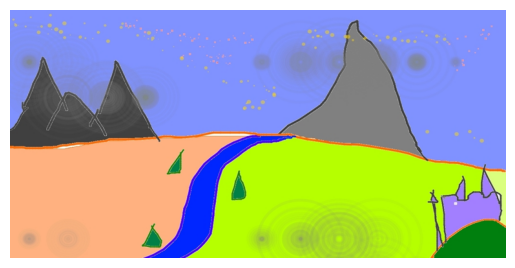

In [7]:
plot_img(init_image)

# Pass to Stable Diffusion

In [15]:
prompt = ""

In [16]:
images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images

100%|██████████| 37/37 [00:06<00:00,  5.78it/s]


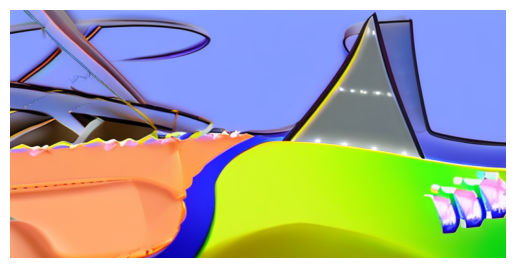

In [17]:
plot_img(images[0])

# Inpainting

In [20]:
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

In [30]:
init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

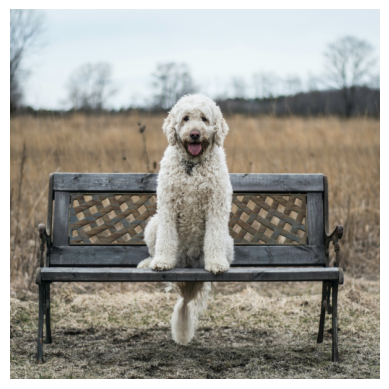

In [31]:
plot_img(init_image)

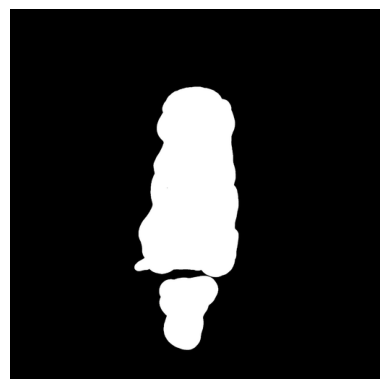

In [32]:
plot_img(mask_image)

In [33]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(inpainting_model, torch_dtype=torch.float16).to(device)

Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 220752.84it/s]
/home/shane/projects/.venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [34]:
prompt = "Face of a yellow cat, high resolution, sitting on a park bench"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

ValueError: Incorrect configuration settings! The config of `pipeline.unet`: FrozenDict([('sample_size', 96), ('in_channels', 4), ('out_channels', 4), ('center_input_sample', False), ('flip_sin_to_cos', True), ('freq_shift', 0), ('down_block_types', ['CrossAttnDownBlock2D', 'CrossAttnDownBlock2D', 'CrossAttnDownBlock2D', 'DownBlock2D']), ('mid_block_type', 'UNetMidBlock2DCrossAttn'), ('up_block_types', ['UpBlock2D', 'CrossAttnUpBlock2D', 'CrossAttnUpBlock2D', 'CrossAttnUpBlock2D']), ('only_cross_attention', False), ('block_out_channels', [320, 640, 1280, 1280]), ('layers_per_block', 2), ('downsample_padding', 1), ('mid_block_scale_factor', 1), ('act_fn', 'silu'), ('norm_num_groups', 32), ('norm_eps', 1e-05), ('cross_attention_dim', 1024), ('attention_head_dim', [5, 10, 20, 20]), ('dual_cross_attention', False), ('use_linear_projection', True), ('class_embed_type', None), ('num_class_embeds', None), ('upcast_attention', True), ('resnet_time_scale_shift', 'default'), ('time_embedding_type', 'positional'), ('timestep_post_act', None), ('time_cond_proj_dim', None), ('conv_in_kernel', 3), ('conv_out_kernel', 3), ('projection_class_embeddings_input_dim', None), ('_class_name', 'UNet2DConditionModel'), ('_diffusers_version', '0.10.0.dev0'), ('_name_or_path', '/home/shane/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/36a01dc742066de2e8c91e7cf0b8f6b53ef53da1/unet')]) expects 4 but received `num_channels_latents`: 4 + `num_channels_mask`: 1 + `num_channels_masked_image`: 4 = 9. Please verify the config of `pipeline.unet` or your `mask_image` or `image` input.